# Text Learning

## 1. Skleran Count Vectorizeer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

String1 = "hi Katie the self driving car will be late Best Sebastian"
String2 = "Hi Sebastian the machine learning class will be great great great Best kaite"
String3 = "Hi Kaite the machine learning class will be most excellent"
email_list = [String1, String2, String3]

vectorizer = CountVectorizer()
vectorizer.fit(email_list)
bag_of_words = vectorizer.transform(email_list)
print(bag_of_words)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (0, 7)	1
  (0, 9)	1
  (0, 10)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (1, 0)	1
  (1, 1)	1
  (1, 3)	1
  (1, 6)	3
  (1, 7)	1
  (1, 8)	1
  (1, 11)	1
  (1, 12)	1
  (1, 14)	1
  (1, 16)	1
  (1, 17)	1
  (2, 0)	1
  (2, 3)	1
  (2, 5)	1
  (2, 7)	1
  (2, 8)	1
  (2, 11)	1
  (2, 12)	1
  (2, 13)	1
  (2, 16)	1
  (2, 17)	1


In [21]:
print(vectorizer.vocabulary_.get("great"))

6


## 2. Stopwords

In [11]:
from nltk.corpus import stopwords
#import nltk
#nltk.download()
sw = stopwords.words("english")
print(len(sw))

179


## 3. Stemming With Nltk

In [24]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
stemmer.stem("responsive")

'respons'

In [25]:
stemmer.stem("unresponsive")

'unrespons'

# 4. Text Learning - News Classification

In [11]:
#Necessary Imports
import numpy as np
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [12]:
#Defining All The Categories
categories = ['alt.atheism',
'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#Creating the training dataset
train = fetch_20newsgroups(subset='train', categories=categories)

#Creating the testing dataset
test = fetch_20newsgroups(subset='test', categories=categories)

#Printing the training set
print(len(train.data[5]))

2602


In [23]:
#Necessary Imports 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

#Creating a classifier based on multinomial naive bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())

#Training the classfier with train data
model.fit(train.data, train.target)

#Predicting the labels with test data
labels = model.predict(test.data)

#Accuracy Score
print(accuracy_score(labels,test.target))

0.772835900159


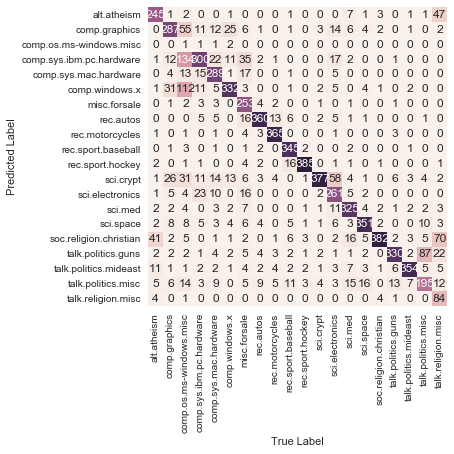

In [37]:
#Creating Confusion Matrix.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [44]:
def predict(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [45]:
predict('Send Rover To Mars')

'sci.space'

In [51]:
predict('President Of USA')

'talk.politics.misc'

In [53]:
predict('Audi Is Better Than Honda')

'rec.autos'